In [1]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## import libraries for sklearn - to train our model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
## load our data
jfk_flight_data = pd.read_csv('M1_final.csv')
jfk_flight_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
## check the data structure
## are there any null values?
jfk_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [5]:
## wind has 2 null values, therefore we either drop these values or replace them 
## I will drop it first
jfk_flight_data.dropna(inplace=True)

In [6]:
## 'Dew Point' is an object type but should be integer, so convert that to integer
jfk_flight_data['Dew Point']= jfk_flight_data['Dew Point'].astype('int64')
## then check the updates
jfk_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  object 
 4   TAIL_NUM           28818 non-null  object 
 5   DEST               28818 non-null  object 
 6   DEP_DELAY          28818 non-null  int64  
 7   CRS_ELAPSED_TIME   28818 non-null  int64  
 8   DISTANCE           28818 non-null  int64  
 9   CRS_DEP_M          28818 non-null  int64  
 10  DEP_TIME_M         28818 non-null  int64  
 11  CRS_ARR_M          28818 non-null  int64  
 12  Temperature        28818 non-null  int64  
 13  Dew Point          28818 non-null  int64  
 14  Humidity           28818 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [8]:
## check there are no null values left
jfk_flight_data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [9]:
## check the statistics of the dataset
jfk_flight_data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,30.422236,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,12.313335,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [ ]:
## what is our objective?
## predicting taxi out delay
## what does taxi out mean? 
## the time a plane spends moving on the airport's taxiways from its gate to the runway prior takeoff

## STATISTICS MEANING;
## min taxi-out is 5min and max is 41min, mean/average is 20.8min
## departure-delay mean: 6.3min
## the length of taxi-out time can depend on several factors; size of plane, weather conditions, congestion of the air traffic - so there are several input variables to affect the dependent (the prediction)
## taxi-out prediction helps in calculationg runway time and directly impacts the cost of the flight
## longer taxi-out time may lead to increased fuel consumption, efficiency of the airline etc..
## departure delay, wind speed, temperature ?

In [10]:
## check the Condition, is it one of the factors delays?
## fog - 147 times - must be an impact?
## heavy rain and wind could inpact the delays as well
jfk_flight_data['Condition'].value_counts()

Mostly Cloudy            9122
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: Condition, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

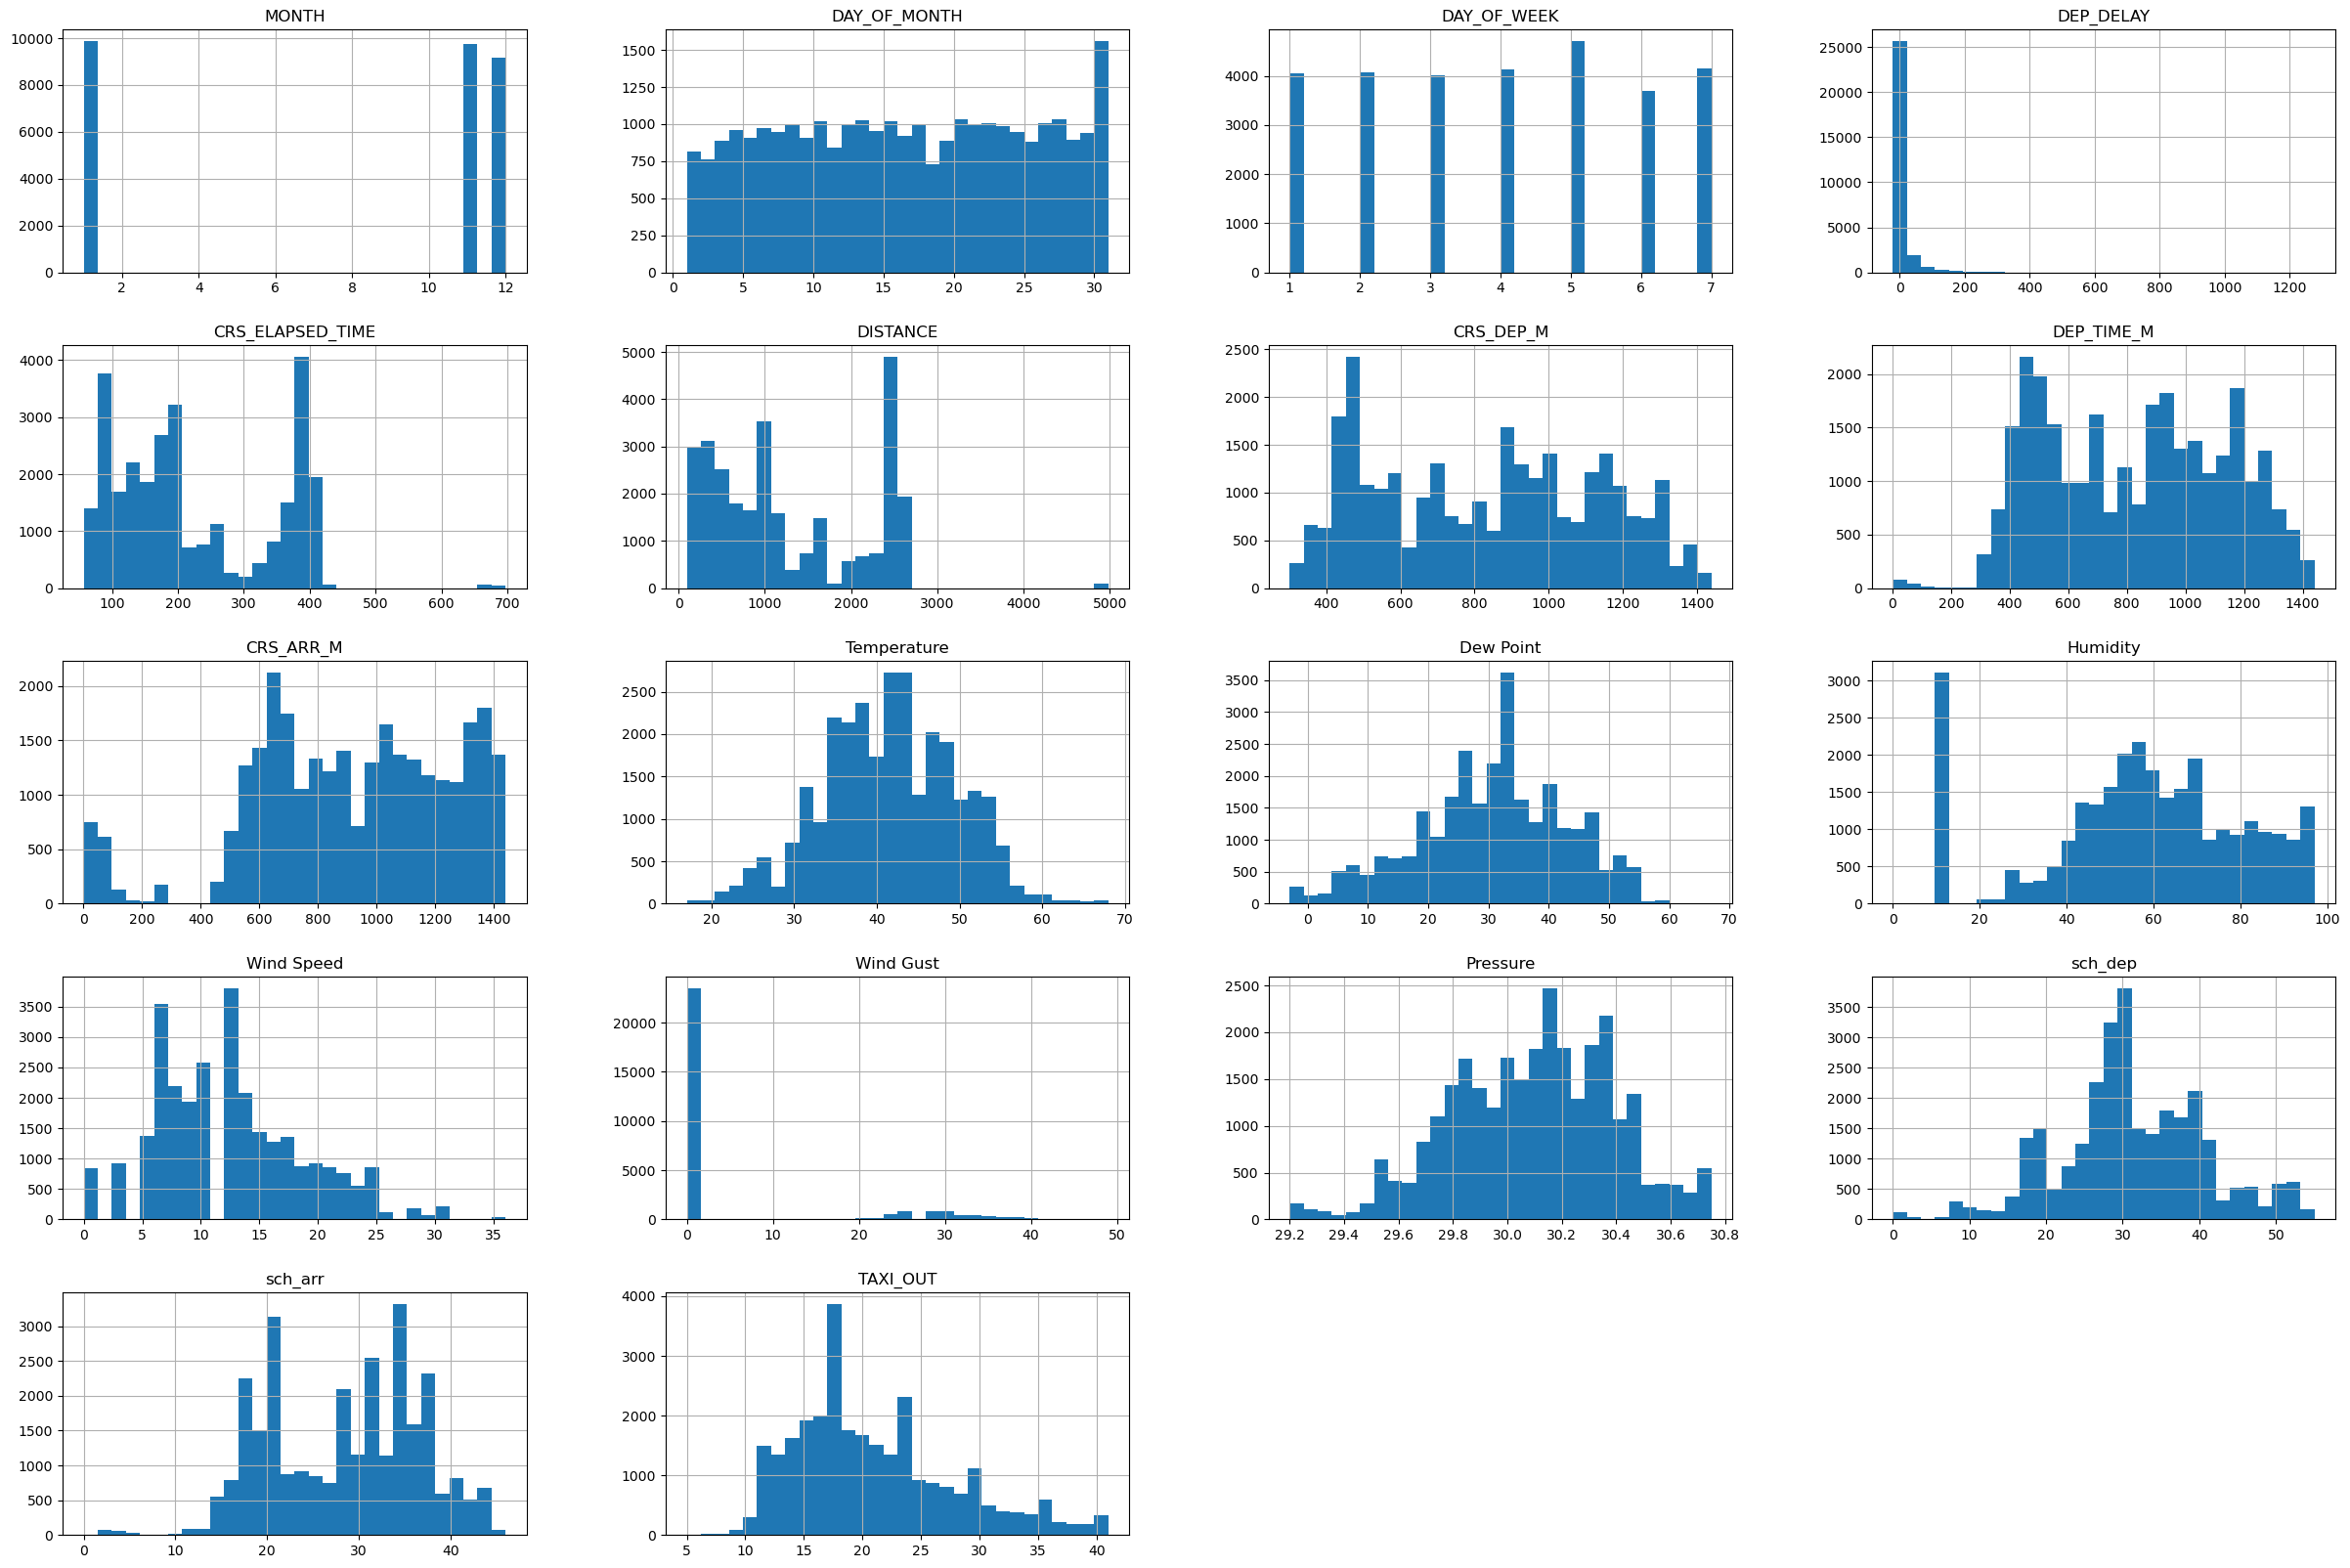

In [11]:
jfk_flight_data.hist(bins=30, figsize=(30, 20))
plt.show

In [12]:
Jfk_corr_matrix = jfk_flight_data.corr()

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_78735/2148277418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Jfk_corr_matrix = jfk_flight_data.corr()


In [13]:
Jfk_corr_matrix

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007274,0.029366,0.046421,-0.016010,-0.000106,0.001732,0.002537,-0.012333,0.135832,0.135151,0.012522,-0.034989,-0.050989,-0.085342,-0.006131,-0.019737,0.018347
DAY_OF_MONTH,-0.007274,1.000000,-0.029732,-0.036634,0.002779,-0.002746,0.001717,0.004407,0.008533,-0.132428,-0.040094,0.096218,-0.093178,-0.088981,0.016845,-0.003392,0.002210,-0.024065
DAY_OF_WEEK,0.029366,-0.029732,1.000000,-0.006204,0.000413,0.002450,0.005412,0.008258,-0.003340,0.013082,-0.073823,0.001627,0.095956,0.127689,0.102294,0.024416,0.009622,0.028397
DEP_DELAY,0.046421,-0.036634,-0.006204,1.000000,-0.030862,-0.031501,0.102330,0.072275,0.043827,-0.032169,0.000062,-0.011771,0.067819,0.044363,-0.064993,-0.065409,-0.006974,0.034759
CRS_ELAPSED_TIME,-0.016010,0.002779,0.000413,-0.030862,1.000000,0.994465,-0.031249,-0.021306,0.035227,-0.016166,0.007161,0.017192,-0.013545,-0.011959,0.010223,0.083376,-0.067643,0.071007
DISTANCE,-0.000106,-0.002746,0.002450,-0.031501,0.994465,1.000000,-0.040889,-0.034529,0.008561,-0.010026,0.009712,0.015105,-0.010828,-0.009544,0.005744,0.059129,-0.088771,0.060006
CRS_DEP_M,0.001732,0.001717,0.005412,0.102330,-0.031249,-0.040889,1.000000,0.946014,0.452628,0.086636,0.001763,0.003857,0.008286,-0.009836,-0.008409,-0.025506,0.495274,0.044562
DEP_TIME_M,0.002537,0.004407,0.008258,0.072275,-0.021306,-0.034529,0.946014,1.000000,0.469934,0.098385,0.009103,-0.005910,0.006265,-0.014284,-0.009541,0.025737,0.544192,0.057584
CRS_ARR_M,-0.012333,0.008533,-0.003340,0.043827,0.035227,0.008561,0.452628,0.469934,1.000000,0.101572,-0.000503,-0.033172,0.014111,0.004470,-0.012644,0.149893,0.424299,0.071524
Temperature,0.135832,-0.132428,0.013082,-0.032169,-0.016166,-0.010026,0.086636,0.098385,0.101572,1.000000,0.787818,0.054392,0.010308,-0.039564,-0.376641,-0.022699,0.076055,-0.067171


Text(0.5, 1.0, 'Heatmap Correlation Matrix')

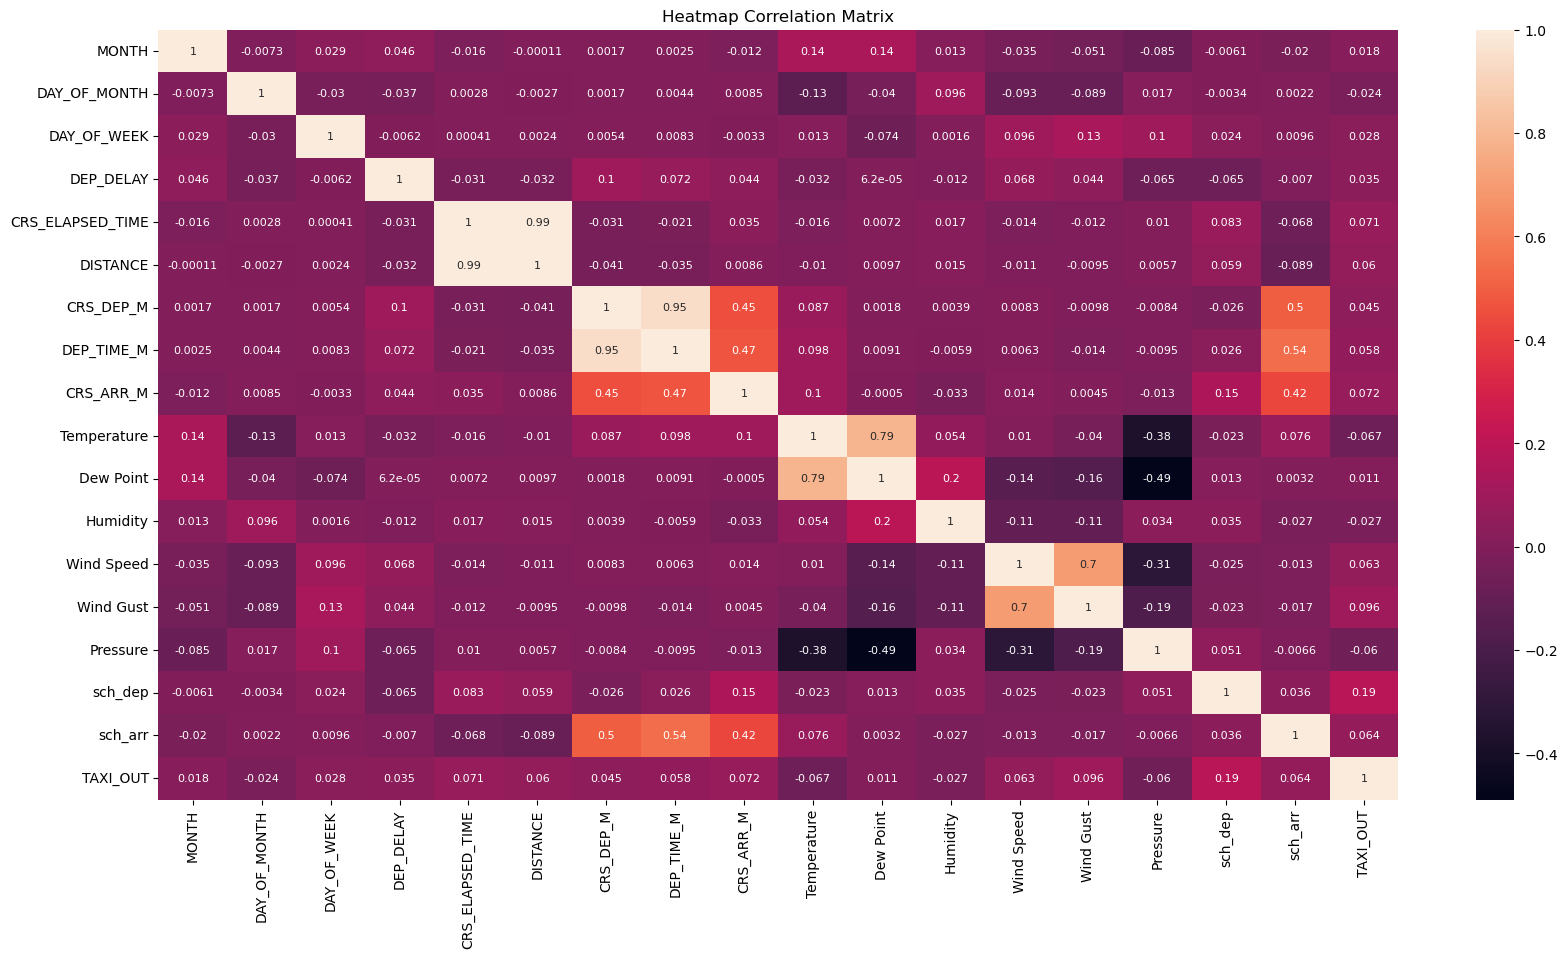

In [14]:
## let's check the correlation with heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(Jfk_corr_matrix, annot=True, annot_kws={'size': 8})
plt.title('Heatmap Correlation Matrix', loc='center')

In [ ]:
## better to take out the objects first, to simlify the model first but first work on it - no action yet

In [15]:
## specifying the variables for testing
## I will choose Pressure vs Dew Point for Linear Regression based on the above Heatmap
## Pressure and Dew Point are important variables as these will show the risk of icing and it will impact the flight

X = jfk_flight_data['Pressure'].values.reshape(-1, 1)
Y = jfk_flight_data['Dew Point'].values.reshape(-1, 1)


In [16]:
## train the model, based on 80% test size and 20% for training
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size= 0.2, random_state=32)

In [17]:
X_train

array([[30.45],
       [30.56],
       [30.37],
       ...,
       [30.08],
       [30.01],
       [30.06]])

In [18]:
X_test

array([[30.15],
       [29.95],
       [30.22],
       ...,
       [29.22],
       [30.2 ],
       [29.95]])

In [27]:
## check if my assumptions make sense
print('X_train size is:', X_train.shape)
print('X_test size is:', X_test.shape)
print('Y_train size is:', Y_train.shape)
print('Y_test size is:', Y_test.shape)


X_train size is: (23054, 1)
X_test size is: (5764, 1)
Y_train size is: (23054, 1)
Y_test size is: (5764, 1)


In [28]:
## create a linear regression object and train the model
linear_regress = LinearRegression().fit(X_train, Y_train)
linear_regress

LinearRegression()

In [29]:
Y_pred = linear_regress.predict(X_test)

In [30]:
## create a dataframe for comparing Actuals and Predictions
pd.DataFrame({'Actual': Y_test.reshape(-1), 'Prediction': Y_pred.reshape(-1)})

,Actual,Prediction
0,25,29.279807
1,20,33.348300
2,32,27.855834
3,30,37.009945
4,44,30.093506
...,...,...
5759,32,27.652410
5760,25,34.161999
5761,51,48.198302
5762,24,28.262684


In [ ]:
## it doesn't look good as there is a big gap between actual and the prediction values

In [31]:
## measure the accuracy if the model is working properly

print('MAE:', metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('MSE:', metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print('R2:', metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))


MAE: 8.820608740572105
MSE: 116.74159202918881
RMSE: 10.804702310993525
R2: 0.24035133754218863


In [ ]:
## my R2 is between 0 and 1 so model works but not the best fit as its relationship is at 24% only
## R2 will be closer to 1 if our model predicts better so need to check other correlations

In [32]:
## let's check another two variables from the heatmap; 
## second linear regression based on Pressure and Temperature
x = jfk_flight_data['Pressure'].values.reshape(-1, 1)
y = jfk_flight_data['Temperature'].values.reshape(-1, 1)


In [33]:
## train the model, based on 80% test size and 20% for training
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.2, random_state=32)

In [34]:
## check again if my assumptions make sense
print('x_train size is:', x_train.shape)
print('x_test size is:', x_test.shape)
print('y_train size is:', y_train.shape)
print('y_test size is:', y_test.shape)

x_train size is: (23054, 1)
x_test size is: (5764, 1)
y_train size is: (23054, 1)
y_test size is: (5764, 1)


In [35]:
## create a linear regression object and train the model
linear_regress = LinearRegression().fit(x_train, y_train)
linear_regress

LinearRegression()

In [36]:
## set our prediction
y_pred = linear_regress.predict(x_test)

In [37]:
## create a dataframe for comparing Actuals and Predictions
pd.DataFrame({'Actual': y_test.reshape(-1), 'Prediction': y_pred.reshape(-1)})

,Actual,Prediction
0,37,40.915379
1,40,42.965120
2,40,40.197969
3,47,44.809887
4,55,41.325327
...,...,...
5759,48,40.095482
5760,40,43.375068
5761,51,50.446674
5762,40,40.402944


In [38]:
## it still doesn't look very good as again my actuals and predictions are far apart
## measure the accuracy if this model is working properly

print('MAE:', metrics.mean_absolute_error(y_test.reshape(-1), y_pred.reshape(-1)))
print('MSE:', metrics.mean_squared_error(y_test.reshape(-1), y_pred.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test.reshape(-1), y_pred.reshape(-1))))
print('R2:', metrics.r2_score(y_test.reshape(-1), y_pred.reshape(-1)))

MAE: 6.03319336371547
MSE: 56.37167316169189
RMSE: 7.508107162374008
R2: 0.14066608138136028


In [39]:
## my R2 is again between 0 and 1 so model works but not the best fit as its relationship is at 14% only
## so previous relationship between Pressure and Dew Point worked better with 24% compared to this one.
## R2 will be closer to 1 if our model preditcs better so need to check other 

In [40]:
## try Lasso model on Pressure and Dew Point
model_lasso_jfk_flights = Lasso(alpha= 0.99)
model_lasso_jfk_flights.fit(X_train, Y_train)

Lasso(alpha=0.99)

In [41]:
pred_lasso_jfk_flights = model_lasso_jfk_flights.predict(X_test)
pd.DataFrame({'Actual': Y_test.reshape(-1), 'Predicted': pred_lasso_jfk_flights.reshape(-1)})

,Actual,Predicted
0,25,29.469730
1,20,32.867808
2,32,28.280402
3,30,35.926078
4,44,30.149345
...,...,...
5759,32,28.110499
5760,25,33.547424
5761,51,45.270794
5762,24,28.620210


In [42]:
## still doesn't look very good as again my actuals and predictions are still very far apart
## measure the accuracy if this model is working properly

print('MAE:', metrics.mean_absolute_error(Y_test.reshape(-1), pred_lasso_jfk_flights.reshape(-1)))
print('MSE:', metrics.mean_squared_error(Y_test.reshape(-1), pred_lasso_jfk_flights.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), pred_lasso_jfk_flights.reshape(-1))))
print('R2:', metrics.r2_score(Y_test.reshape(-1), pred_lasso_jfk_flights.reshape(-1)))

MAE: 8.816160110934728
MSE: 117.72350155572455
RMSE: 10.850046154543517
R2: 0.23396195869680714


In [ ]:
## my R2 is still at %16, so best to go back to first model with linear regression and standardize the data 
## maybe try multiple linear regression model